In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm
%matplotlib inline 

In [2]:
gdp_df=pd.read_csv("../data/gdp_per_capita.csv", skipfooter=2) 
gdp_df.head(n=10)

<ipython-input-2-0785479650ca>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df=pd.read_csv("../data/gdp_per_capita.csv", skipfooter=2)


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   int64  
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 210.4+ KB


In [4]:
gdp_df.drop(["Value Footnotes"], axis=1, inplace=True)

In [5]:
gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"}, inplace=True)

In [6]:
gdp_df.shape

(6729, 3)

- It has rows=6731 and column=3
- column 'year' should be in date format. also we need to remove extra footnote rows to convert Year inte date format.

- year reprsented from 1990-2018

In [7]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


gdp_df.drop( gdp_df[ (gdp_df['Year'] == 'Footnote') ].index , inplace=True)
gdp_df.drop(gdp_df[gdp_df['Year'] =='Excludes South Sudan after July 9, 2011.'].index, inplace=True)

gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], infer_datetime_format=True)

gdp_df.dtypes

In [8]:
gdp_df.describe(include='all')


,Country,Year,GDP_Per_Capita
count,6729,6729.000000,6729.000000
unique,243,NaN,NaN
top,North Macedonia,NaN,NaN
freq,29,NaN,NaN
mean,NaN,2004.293357,15468.017091
std,NaN,8.269834,17995.866104
min,NaN,1990.000000,438.643111
25%,NaN,1997.000000,3170.407545
50%,NaN,2004.000000,8959.240204
75%,NaN,2011.000000,20940.081023


In [9]:
gdp_df["Year"].value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

In [10]:
gdp_2014=gdp_df[gdp_df["Year"]==2014]


In [11]:
gdp_2014

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555
...,...,...,...
6592,West Bank and Gaza,2014,4445.307470
6617,World,2014,14514.392218
6646,Yemen,2014,3828.484887
6675,Zambia,2014,3684.685507


In [12]:
gdp_2014.describe(include='all')

,Country,Year,GDP_Per_Capita
count,240,240.0,240.000000
unique,240,NaN,NaN
top,North Macedonia,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2014.0,18034.303556
std,NaN,0.0,19320.930599
min,NaN,2014.0,672.681648
25%,NaN,2014.0,4301.187365
50%,NaN,2014.0,11868.067810
75%,NaN,2014.0,24388.408410


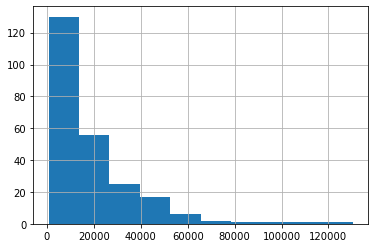

In [13]:
gdp_2014['GDP_Per_Capita'].hist()

plt.hist(gdp_2014["GDP_Per_Capita"])

In [14]:
gdp_2014.sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


In [15]:
gdp_2014.head(n=5)

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [16]:
gdp_2014.tail(n=5)

,Country,Year,GDP_Per_Capita
6592,West Bank and Gaza,2014,4445.307470
6617,World,2014,14514.392218
6646,Yemen,2014,3828.484887
6675,Zambia,2014,3684.685507
6704,Zimbabwe,2014,2506.490220


In [17]:
gdp_pivoted=gdp_df.pivot(index='Country', columns='Year', values='GDP_Per_Capita')

In [18]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,3236.196368,3314.761163,3208.119899,3517.569954,3920.320010,4137.843864,...,3816.165070,4019.485067,4405.778573,4568.509070,4559.032259,4445.307470,4493.612080,4600.685400,4651.723645,4576.432497
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,12726.100963,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4359.812628,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504


In [19]:
#gdp_pivoted=gdp_pivoted[[1990, 2017]].dropna() #selects only two of the column


#gdp_pivoted.drop(
    
#gdp_pivoted[ 
        #(gdp_pivoted['1990-01-01'].notnull()) & (gdp_pivoted['2017-01-01'].notnull())
    #]#.index
#)

gdp_pivoted[[1990-01-01,2017-01-01]]


In [20]:
gdp_pivoted=gdp_pivoted.dropna(axis=0, subset=[1990, 2017])

In [21]:
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896
Arab World,10491.507721,10243.813560,10573.827918,10618.558714,10657.260745,10613.855460,10851.959106,11067.833926,11466.169109,11483.857782,...,14088.061299,14422.893708,14518.827448,15133.232839,15259.209502,15286.726815,15451.349481,15685.811076,15542.746104,15590.398354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1457.594613,1512.269780,1609.492026,1705.335543,1822.025810,1962.305534,2112.914861,2253.625263,2353.555715,2437.195887,...,4207.756178,4433.467826,4662.223052,4856.000604,5065.643427,5312.492183,5608.471859,5895.628492,6233.485045,6608.621686
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,12726.100963,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4359.812628,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504


In [22]:
gdp_pivoted['Percent_Change']=100*((gdp_pivoted[2017]- gdp_pivoted[1990])/gdp_pivoted[1990])

<ipython-input-22-d48f3aca062f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change']=100*((gdp_pivoted[2017]- gdp_pivoted[1990])/gdp_pivoted[1990])


In [23]:
gdp_pivoted.tail()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Vietnam,1457.594613,1512.269780,1609.492026,1705.335543,1822.025810,1962.305534,2112.914861,2253.625263,2353.555715,2437.195887,...,4433.467826,4662.223052,4856.000604,5065.643427,5312.492183,5608.471859,5895.628492,6233.485045,6608.621686,327.655604
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172,73.179298
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504,-29.812379
Zambia,2339.137959,2278.802025,2185.120656,2278.347123,2031.776457,2038.510332,2108.910953,2130.519957,2064.467651,2102.074889,...,3338.097186,3419.010460,3566.382521,3631.003858,3684.685507,3677.735019,3703.012866,3717.667166,3747.972455,58.933215
Zimbabwe,2819.549467,2906.272849,2591.007534,2572.870395,2768.309953,2736.486436,2985.856605,3036.422224,3099.076182,3054.064189,...,1928.017081,2168.110293,2486.847930,2491.635140,2506.490220,2509.008140,2489.097494,2568.410072,2688.406942,-8.907075


In [24]:
pd.value_counts(gdp_pivoted['Percent_Change']<0)

False    189
True      20
Name: Percent_Change, dtype: int64

20 countries have negative growth.

Equatorial Guinea	 had the highest percapita GDP change


In [25]:
gdp_pivoted.sort_values(by='Percent_Change')

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Dem. Rep. Congo,1386.933242,1224.289222,1053.895778,877.129534,812.826913,792.465521,762.692295,702.278040,675.116882,631.233874,...,659.795884,682.007332,706.367203,741.173888,784.872656,811.892718,804.522978,807.752905,827.138253,-41.759785
United Arab Emirates,112349.597967,106956.142032,104302.087362,99773.318131,101017.748526,102387.224757,103032.432941,105953.226103,100904.474777,98483.117672,...,55362.989819,56574.288175,57851.693874,60403.045585,62879.703021,65742.650738,67045.104291,66477.818719,66616.050283,-40.829500
Burundi,1027.396660,1054.315509,1042.367169,958.362409,905.890283,821.872598,747.006063,727.681594,754.429748,737.090826,...,733.727723,739.219255,748.075521,760.699070,768.469837,715.549886,689.014892,670.777072,660.330341,-34.710993
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504,-29.812379
Ukraine,10463.959955,9563.882136,8611.474559,7382.299722,5717.528569,5059.822915,4594.432331,4497.390275,4451.547944,4484.733006,...,7824.498452,8281.867126,8322.173034,8338.915050,8243.473515,7464.939834,7678.053699,7906.540301,NaN,-24.440266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
East Asia & Pacific (IDA & IBRD),2246.661835,2383.625503,2592.162043,2824.797574,3074.842270,3326.964481,3575.360911,3770.233392,3759.818795,3937.999186,...,9003.120287,9676.715890,10321.561918,10973.828935,11618.176984,12276.711343,12955.860868,13686.880719,14448.235227,509.209651
East Asia & Pacific (excluding high income),2222.407152,2357.881139,2564.104057,2794.138239,3041.406513,3290.764226,3536.491963,3729.337215,3719.147142,3895.496275,...,8907.486390,9574.184054,10212.473945,10858.143186,11496.012396,12147.948865,12820.367497,13544.178535,14297.925500,509.437318
Myanmar,730.228038,715.865296,775.554961,813.030659,863.890169,913.008761,959.793711,1001.087335,1046.243846,1146.433298,...,3688.491636,3864.959768,4114.227664,4423.146388,4737.459861,5030.264149,5288.570199,5610.324700,5922.023358,668.297629


Country
China                AxesSubplot(0.125,0.125;0.775x0.755)
Equatorial Guinea    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

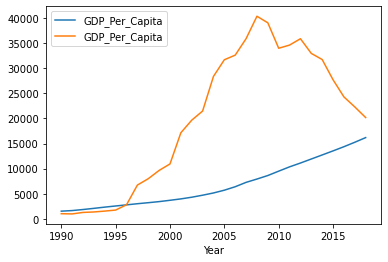

In [26]:
highGDP=gdp_df[gdp_df['Country'].isin(['China', 'Equatorial Guinea'])]

fig, ax = plt.subplots()

highGDP.groupby('Country').plot(x='Year', y='GDP_Per_Capita', ax=ax, legend=True)


In [27]:
highGDP.melt

<bound method DataFrame.melt of                 Country  Year  GDP_Per_Capita
1126              China  2018    16181.777716
1127              China  2017    15253.993071
1128              China  2016    14368.630801
1129              China  2015    13534.846237
1130              China  2014    12725.089099
1131              China  2013    11919.607104
1132              China  2012    11115.110675
1133              China  2011    10355.495713
1134              China  2010     9498.079744
1135              China  2009     8626.532479
1136              China  2008     7924.644365
1137              China  2007     7264.060036
1138              China  2006     6392.373888
1139              China  2005     5702.800579
1140              China  2004     5149.601901
1141              China  2003     4704.586800
1142              China  2002     4302.226871
1143              China  2001     3968.773863
1144              China  2000     3689.967255
1145              China  1999     3428.063172
11

In [28]:
continents=pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [29]:
gdp_df=gdp_df.merge(continents, on='Country')

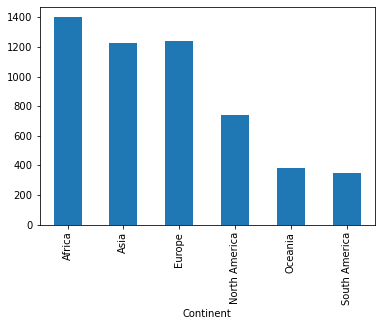

In [30]:
gdp_df.groupby('Continent')['Country'].count().plot(kind='bar')

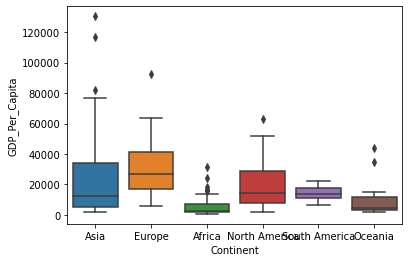

In [31]:
sns.boxplot(data=gdp_df[gdp_df['Year']==2014], x='Continent', y='GDP_Per_Capita')

In [68]:
internet_df=pd.read_csv("../data/internet_use.csv", skipfooter=182 )


<ipython-input-68-736e8999d06b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  internet_df=pd.read_csv("../data/internet_use.csv", skipfooter=182 )


In [63]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes,Unnamed: 4,Unnamed: 5
4490,Zimbabwe,1997,0.033080,NaN,NaN,NaN
4491,Zimbabwe,1996,0.016790,NaN,NaN,NaN
4492,Zimbabwe,1995,0.007684,NaN,NaN,NaN
4493,Zimbabwe,1994,0.001739,NaN,NaN,NaN
4494,Zimbabwe,1990,0.000000,NaN,NaN,NaN


In [69]:
internet_df.drop(['Value Footnotes', 'Unnamed: 4', 'Unnamed: 5'], axis=1, inplace=True)


In [72]:
internet_df.rename(columns={"Country or Area":"Country", "Value":"Internet_Users_Pct"}, inplace=True)

In [73]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [74]:
internet_df.shape
internet_df.info()
internet_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


,Year,Internet_Users_Pct
count,4495.000000,4495.000000
mean,2002.732814,18.675495
std,7.856270,25.091999
min,1960.000000,0.000000
25%,1998.000000,0.346593
50%,2003.000000,5.265683
75%,2009.000000,30.581020
max,2014.000000,98.160000


In [75]:
internet_df.tail()

,Country,Year,Internet_Users_Pct
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


In [82]:
internet_df[internet_df['Internet_Users_Pct']>0].nsmallest(1, "Year")

,Country,Year,Internet_Users_Pct
204,Australia,1990,0.585095


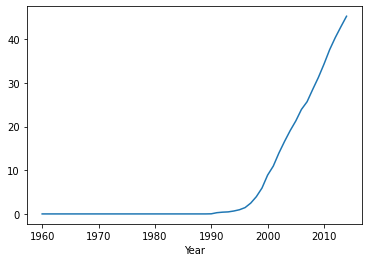

In [83]:
internet_df.groupby('Year')['Internet_Users_Pct'].mean().plot()

In [85]:
gdp_and_internet_use=gdp_df.merge(internet_df, on=('Country', 'Year')) 

gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [86]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


In [87]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


In [88]:
gdp_and_internet_use_2014['Internet_Users_Pct'].mean()

44.673536463414635

In [89]:
gdp_and_internet_use_2014[
    gdp_and_internet_use_2014['Internet_Users_Pct']>=90].count()

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64

In [90]:
gdp_and_internet_use_2014.nlargest(3, 'GDP_Per_Capita')


,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00


In [103]:


GdpBest3=gdp_and_internet_use[
    (gdp_and_internet_use['Country']=="Qatar")| 
    (gdp_and_internet_use['Country']=="Luxembourg")|
    (gdp_and_internet_use['Country']=="Singapore")]

In [104]:
GdpBest3

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1812,Luxembourg,2014,92349.186429,Europe,94.670000
1813,Luxembourg,2013,90656.380431,Europe,93.776500
1814,Luxembourg,2012,89505.159080,Europe,91.949924
1815,Luxembourg,2011,92005.016836,Europe,90.029859
1816,Luxembourg,2010,91743.293852,Europe,90.620000
...,...,...,...,...,...
2785,Singapore,1994,43835.783293,Asia,1.185204
2786,Singapore,1993,40714.217145,Asia,0.763278
2787,Singapore,1992,37463.009189,Asia,0.471368
2788,Singapore,1991,36201.887548,Asia,0.161504


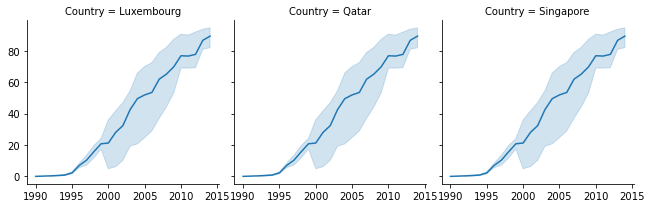

In [111]:
g=sns.FacetGrid(GdpBest3, col='Country') 
g.map(sns.lineplot, x='Year', y='Internet_Users_Pct', data=GdpBest3)


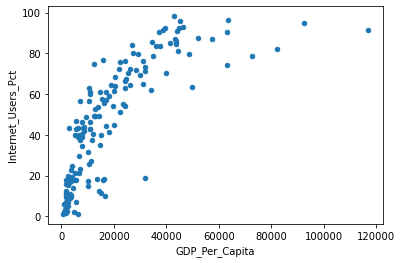

In [118]:
gdp_and_internet_use_2014.plot(kind='scatter', x='GDP_Per_Capita', y='Internet_Users_Pct')

In [130]:
gdp_and_internet_use_2014['GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

0.7879885707262836

In [131]:
gdp_and_internet_use_2014['log_GDP_per_capita']=np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


<ipython-input-131-15a19ec6725f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['log_GDP_per_capita']=np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


In [132]:
gdp_and_internet_use_2014['log_GDP_per_capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])

0.8844322971419831

In [134]:
US_GDP_perCap_InternetUse=gdp_and_internet_use[gdp_and_internet_use['Country']=="United States"]

In [135]:
US_GDP_perCap_InternetUse

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3343,United States,2014,52080.792568,North America,87.360000
3344,United States,2013,51208.892428,North America,84.200000
3345,United States,2012,50632.443448,North America,79.300000
3346,United States,2011,49883.113984,North America,69.729461
3347,United States,2010,49479.248679,North America,71.690000
3348,United States,2009,48644.151110,North America,71.000000
3349,United States,2008,50349.715322,North America,74.000000
3350,United States,2007,50897.731238,North America,75.000000
3351,United States,2006,50437.806235,North America,68.931193
3352,United States,2005,49512.926789,North America,67.968053


In [136]:
US_GDP_perCap_InternetUse['GDP_Per_Capita'].corr(US_GDP_perCap_InternetUse['Internet_Users_Pct'])

0.9916180229625119

This is totally expected result as both internet use and percapita income increased over past decades. 